# Étude de la Quantization

Analyse de l'impact de différents schémas de quantization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Fonctions de base

In [2]:
def quantize(float_value, min_range, max_range, zero=0):
    b = 8
    S = (max_range - min_range) / (2**b - 1)
    return (float_value / S).astype(np.int8)

def to_float(uint_values, min_range, max_range):
    b = 8
    S = (max_range - min_range) / (2**b - 1)
    return uint_values.astype(np.float32) * S

## Fonctions d'analyse

In [3]:
def display_error_histogram(values, min_range, max_range):
    quantized = quantize(values, min_range, max_range)
    reconstructed = to_float(quantized, min_range, max_range)
    errors = np.abs(values - reconstructed)
    
    plt.figure(figsize=(10, 4))
    plt.hist(errors, bins=50, edgecolor='black')
    plt.xlabel('Erreur absolue')
    plt.ylabel('Fréquence')
    plt.title(f'Erreurs - min={min_range}, max={max_range}')
    plt.grid(True, alpha=0.3)
    plt.show()

def quantization_error_stats(values, min_range, max_range):
    quantized = quantize(values, min_range, max_range)
    reconstructed = to_float(quantized, min_range, max_range)
    errors = np.abs(values - reconstructed)
    return errors.mean(), errors.std()

## Situation 1: [0, 0.5] → [0, 1]

Moyenne: 0.001987
Écart-type: 0.001128


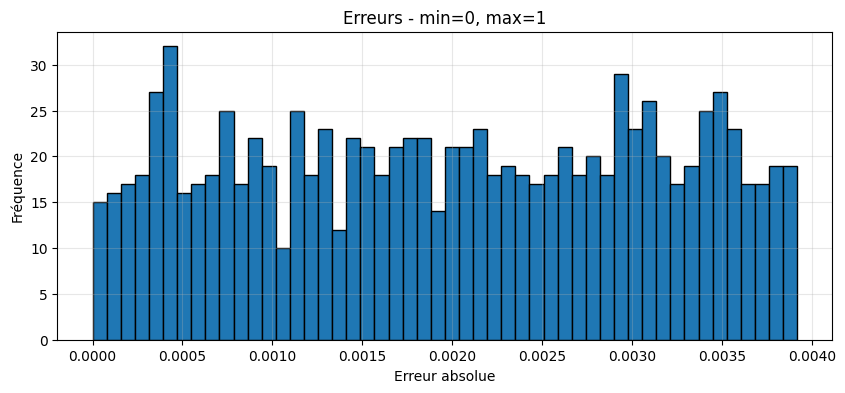

In [4]:
np.random.seed(42)
values_1 = np.random.uniform(0, 0.5, 1000)
mean_err, std_err = quantization_error_stats(values_1, 0, 1)
print(f'Moyenne: {mean_err:.6f}')
print(f'Écart-type: {std_err:.6f}')
display_error_histogram(values_1, 0, 1)

## Situation 1 bis: [0, 1] → [0, 1]

Moyenne: 0.519955
Écart-type: 0.501716


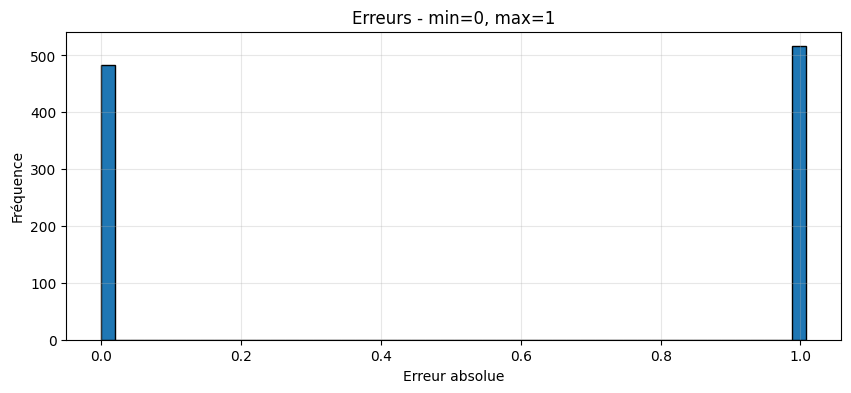

In [5]:
values_1bis = np.random.uniform(0, 1, 1000)
mean_err, std_err = quantization_error_stats(values_1bis, 0, 1)
print(f'Moyenne: {mean_err:.6f}')
print(f'Écart-type: {std_err:.6f}')
display_error_histogram(values_1bis, 0, 1)

## Situation 2: [0, 2] → [0, 1] (saturation)

Moyenne: 1.025011
Écart-type: 0.708870


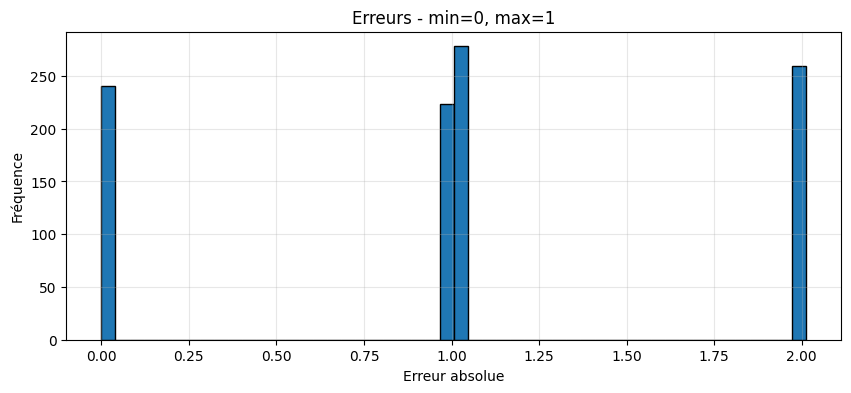

In [6]:
values_2 = np.random.uniform(0, 2, 1000)
mean_err, std_err = quantization_error_stats(values_2, 0, 1)
print(f'Moyenne: {mean_err:.6f}')
print(f'Écart-type: {std_err:.6f}')
display_error_histogram(values_2, 0, 1)

## Situation 3: [100, 101] → [0, 1000]

Moyenne: 2.451160
Écart-type: 0.286346


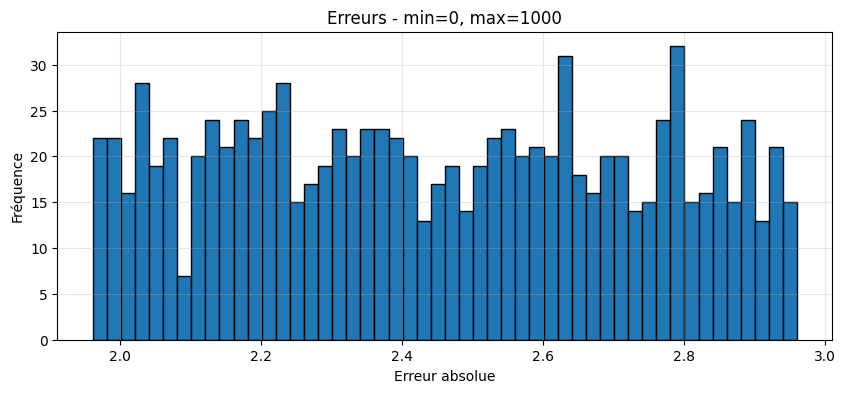

In [7]:
values_3 = np.random.uniform(100, 101, 1000)
mean_err, std_err = quantization_error_stats(values_3, 0, 1000)
print(f'Moyenne: {mean_err:.6f}')
print(f'Écart-type: {std_err:.6f}')
display_error_histogram(values_3, 0, 1000)

## Situation 4 (bonus): Distribution normale

Plage: [-2.93, 3.24]
Moyenne: 0.024261
Écart-type: 0.277054


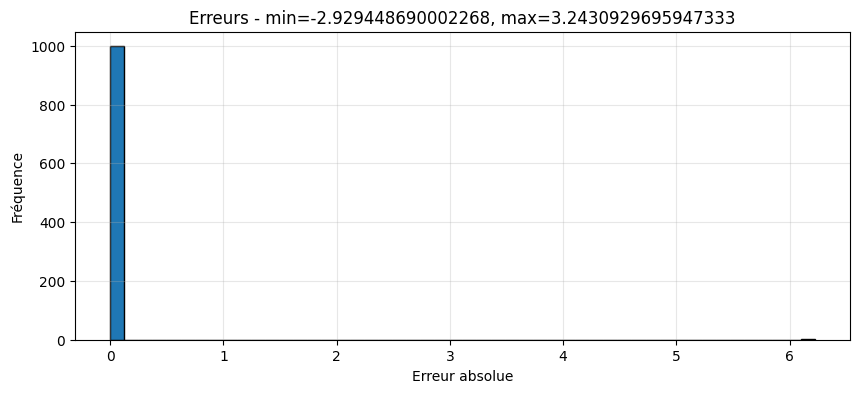

In [8]:
values_4 = np.random.normal(0, 1, 1000)
mn, mx = values_4.min(), values_4.max()
mean_err, std_err = quantization_error_stats(values_4, mn, mx)
print(f'Plage: [{mn:.2f}, {mx:.2f}]')
print(f'Moyenne: {mean_err:.6f}')
print(f'Écart-type: {std_err:.6f}')
display_error_histogram(values_4, mn, mx)

## Situation 5 (bonus): Plage étroite [0.5, 0.501]

Moyenne: 0.002454
Écart-type: 0.000291


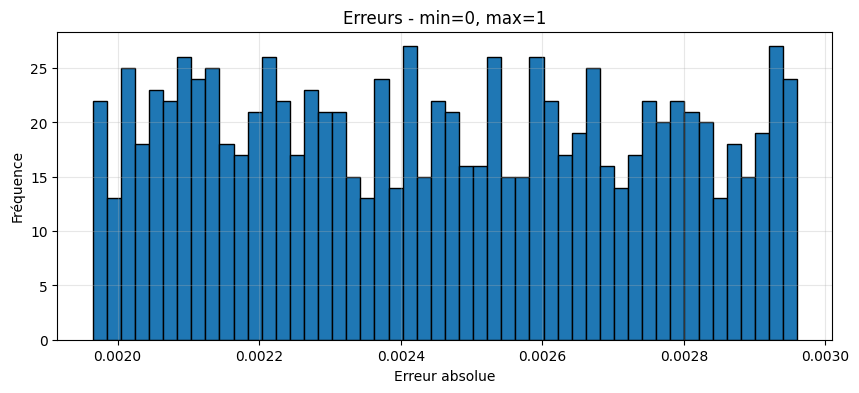

In [9]:
values_5 = np.random.uniform(0.5, 0.501, 1000)
mean_err, std_err = quantization_error_stats(values_5, 0, 1)
print(f'Moyenne: {mean_err:.6f}')
print(f'Écart-type: {std_err:.6f}')
display_error_histogram(values_5, 0, 1)

## Situation 6 (bonus): Valeurs négatives [-1, 1]

Moyenne: 0.003890
Écart-type: 0.002209


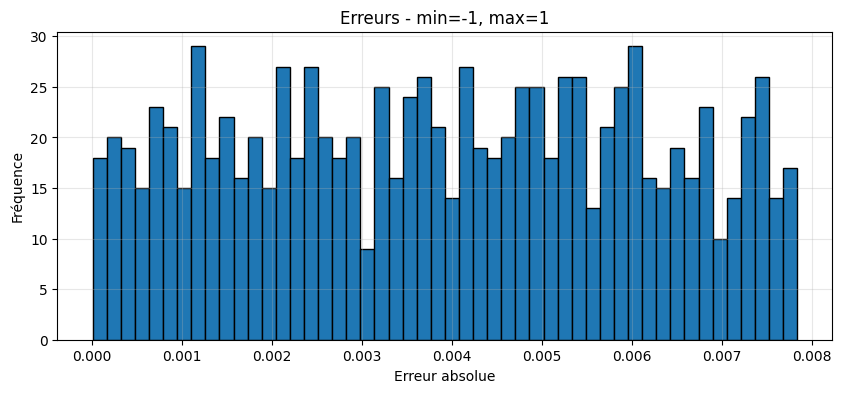

In [10]:
values_6 = np.random.uniform(-1, 1, 1000)
mean_err, std_err = quantization_error_stats(values_6, -1, 1)
print(f'Moyenne: {mean_err:.6f}')
print(f'Écart-type: {std_err:.6f}')
display_error_histogram(values_6, -1, 1)

## Comparaison globale

In [12]:
situations = [
    ('Sit 1: [0,0.5] → [0,1]', values_1, 0, 1),
    ('Sit 1bis: [0,1] → [0,1]', values_1bis, 0, 1),
    ('Sit 2: [0,2] → [0,1]', values_2, 0, 1),
    ('Sit 3: [100,101] → [0,1000]', values_3, 0, 1000),
    ('Sit 4: Normal', values_4, mn, mx),
    ('Sit 5: [0.5,0.501] → [0,1]', values_5, 0, 1),
    ('Sit 6: [-1,1] → [-1,1]', values_6, -1, 1)
]

for name, vals, mn_r, mx_r in situations:
    m, s = quantization_error_stats(vals, mn_r, mx_r)
    print(f'{name:30s} | Moy: {m:.6f} | Std: {s:.6f}')

Sit 1: [0,0.5] → [0,1]         | Moy: 0.001987 | Std: 0.001128
Sit 1bis: [0,1] → [0,1]        | Moy: 0.519955 | Std: 0.501716
Sit 2: [0,2] → [0,1]           | Moy: 1.025011 | Std: 0.708870
Sit 3: [100,101] → [0,1000]    | Moy: 2.451160 | Std: 0.286346
Sit 4: Normal                  | Moy: 0.024261 | Std: 0.277054
Sit 5: [0.5,0.501] → [0,1]     | Moy: 0.002454 | Std: 0.000291
Sit 6: [-1,1] → [-1,1]         | Moy: 0.003890 | Std: 0.002209


## Conclusions

**Observations:**

1. **Sit 1 (0.002):** Bonne précision car valeurs concentrées sur la moitié de la plage
2. **Sit 1bis (0.520):** Erreur moyenne élevée car utilise toute la plage [0,1]
3. **Sit 2 (1.025):** Très mauvais - saturation des valeurs > 1
4. **Sit 3 (2.451):** Catastrophique - plage [0,1000] pour valeurs dans [100,101]
5. **Sit 4 (0.024):** Distribution normale bien adaptée à sa plage
6. **Sit 5 (0.002):** Plage très étroite mais peu de diversité
7. **Sit 6 (0.004):** Valeurs négatives gérées correctement

**Leçons:**
- Adapter min_range et max_range au plus proche de la plage réelle
- Éviter les plages trop larges (Sit 3) ou dépassées (Sit 2)
- Plus la plage de quantification est grande par rapport aux valeurs, plus l'erreur augmente